In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-car-dataset-ford-and-mercedes/cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/audi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/toyota.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/skoda.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/ford.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vauxhall.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/bmw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/hyundi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/merc.csv


In [2]:
df=pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/merc.csv')
df.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [11]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [5]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [12]:
print(df['model'].unique())
print(df['transmission'].unique())
print(df['fuelType'].unique())
#we will make these 'LabelEncoder'

[' SLK' ' S Class' ' SL CLASS' ' G Class' ' GLE Class' ' GLA Class'
 ' A Class' ' B Class' ' GLC Class' ' C Class' ' E Class' ' GL Class'
 ' CLS Class' ' CLC Class' ' CLA Class' ' V Class' ' M Class' ' CL Class'
 ' GLS Class' ' GLB Class' ' X-CLASS' '180' ' CLK' ' R Class' '230' '220'
 '200']
['Automatic' 'Manual' 'Semi-Auto' 'Other']
['Petrol' 'Hybrid' 'Diesel' 'Other']


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['model'])
df['model']=le.transform(df['model'])  
le.fit(df['transmission'])
df['transmission']=le.transform(df['transmission'])
le.fit(df['fuelType'])
df['fuelType']=le.transform(df['fuelType'])
print(df.head(5))

   model  year  price  transmission  mileage  fuelType  tax   mpg  engineSize
0     20  2005   5200             0    63000         3  325  32.1         1.8
1     18  2017  34948             0    27000         1   20  61.4         2.1
2     19  2016  49948             0     6200         3  555  28.0         5.5
3      9  2016  61948             0    16000         3  325  30.4         4.0
4      9  2016  73948             0     4000         3  325  30.1         4.0


In [18]:
df.info()
#all of columns are numeric now.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  int64  
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  int64  
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  int64  
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 922.6 KB


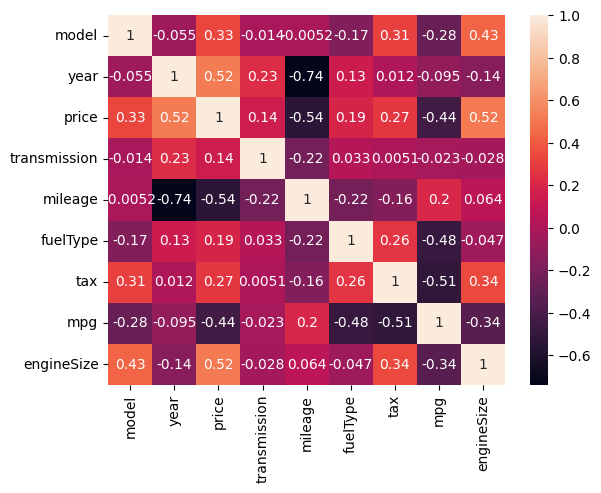

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
data=df.corr(method='pearson')
sns.heatmap(data=data,annot=True)
plt.show()
#as you see model and engine size has most positive effect on price but mileage has most negative effect on price.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


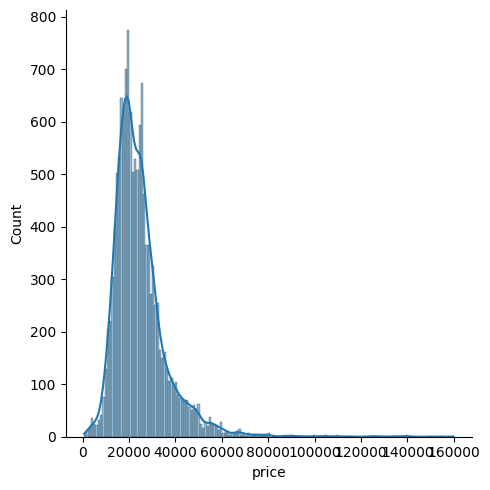

In [42]:
sns.displot(df['price'],kde=True)
plt.tight_layout()
plt.show()
#price distrubition seems okay!

In [46]:
y=df['price']
x=df.drop(columns='price')
print(x.head(5))
#we have to convert this values float32

   model  year  transmission  mileage  fuelType  tax   mpg  engineSize
0     20  2005             0    63000         3  325  32.1         1.8
1     18  2017             0    27000         1   20  61.4         2.1
2     19  2016             0     6200         3  555  28.0         5.5
3      9  2016             0    16000         3  325  30.4         4.0
4      9  2016             0     4000         3  325  30.1         4.0


In [48]:
y=y.astype('float32')
x=x.astype('float32')
print(x.head(5))
print(y.head(5))

   model    year  transmission  mileage  fuelType    tax        mpg  \
0   20.0  2005.0           0.0  63000.0       3.0  325.0  32.099998   
1   18.0  2017.0           0.0  27000.0       1.0   20.0  61.400002   
2   19.0  2016.0           0.0   6200.0       3.0  555.0  28.000000   
3    9.0  2016.0           0.0  16000.0       3.0  325.0  30.400000   
4    9.0  2016.0           0.0   4000.0       3.0  325.0  30.100000   

   engineSize  
0         1.8  
1         2.1  
2         5.5  
3         4.0  
4         4.0  
0     5200.0
1    34948.0
2    49948.0
3    61948.0
4    73948.0
Name: price, dtype: float32


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=22)
x_train=mm.fit_transform(x_train)
x_test=mm.transform(x_test)
#getting ready for learning.

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
#input layer
model.add(Dense(64, input_dim=8, activation='relu'))
#hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
#output layer
model.add(Dense(1))
#'adam' has most score 
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
#training time!
model.fit(x_train, y_train, epochs=200, batch_size=500, validation_data=(x_test, y_test))


Epoch 1/200


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0000e+00 - loss: 750408512.0000 - val_accuracy: 0.0000e+00 - val_loss: 741900608.0000
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 737956288.0000 - val_accuracy: 0.0000e+00 - val_loss: 741636288.0000
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 755720064.0000 - val_accuracy: 0.0000e+00 - val_loss: 740604224.0000
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 752970560.0000 - val_accuracy: 0.0000e+00 - val_loss: 737269312.0000
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 736282432.0000 - val_accuracy: 0.0000e+00 - val_loss: 728654272.0000
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 750552768.0000 - val_accuracy: 0.0000e+00 - val_loss: 710285312.0000
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 716790144.0000 - val_ac

<Axes: >

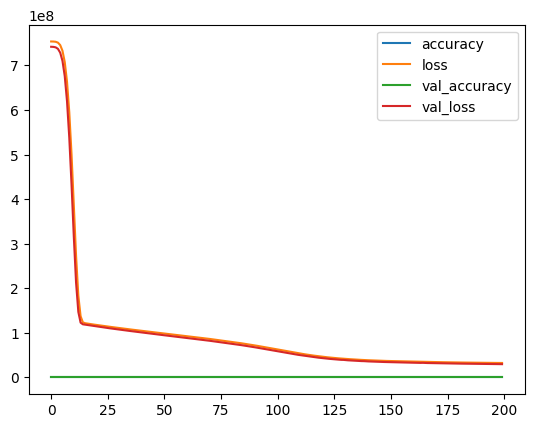

In [56]:
lost_data=pd.DataFrame(model.history.history)
lost_data
lost_data.plot()

In [77]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_pred=model.predict(x_test)
mean_absolute_error(y_test,y_pred)
mean_squared_error(y_test,y_pred)



123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step


29860102.0